In [ ]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display
from scipy.stats import mannwhitneyu, wilcoxon

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.metric.metric import MetricCalculator
from mesostat.utils.hdf5_io import DataStorage

from lib.sych.data_fc_db_raw import DataFCDatabase
from lib.sych.plot_helper import imshow_dataset_by_mouse, imshow_dataset_by_session
from lib.sych.metric_helper import metric_by_session

%load_ext autoreload
%autoreload 2

In [ ]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
params['root_path_data'] = './'

In [ ]:
dataDB = DataFCDatabase(params)

In [ ]:
ds = DataStorage('sych_result_individual_region.h5')

In [ ]:
mc = MetricCalculator(serial=True, verbose=False)

# 1. Frequency properties
## 1.1 SNR via AutoCorrelation

**Plan:**
* AutoCorr[1] is a number that is close to 1 if data is changing slowly, and close to zero if data changes very fast.

**FIXME**:
* Remove Performance above 1
* If performance becomes important, discuss with Y whether to use original or pooled performance, as they differ significantly

In [ ]:
metricName = 'autocorr_d1'
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    for datatype in dataDB.get_data_types(mousename):
        dataName = metricName + '_' + datatype
        print(dataName)
        metric_by_session(dataDB, mc, ds, mousename, metricName, 'p', datatype=datatype, dataName=dataName)

In [ ]:
metricName = 'autocorr_d1'
for datatype in dataDB.get_data_types('mvg_4'):
    dataName = metricName + '_' + datatype
    imshow_dataset_by_mouse(dataDB, ds, dataName, limits=[0,1])

# 2. Activity

## 2.1 Variance-based measures

In [20]:
for metricName in ['mean', 'std', 'avg_entropy']:
    for iMouse, mousename in enumerate(sorted(dataDB.mice)):
        for datatype in dataDB.get_data_types(mousename):
            dataName = metricName + '_' + datatype
            print(dataName)
            metric_by_session(dataDB, mc, ds, mousename, metricName, 'p', datatype=datatype, dataName=dataName)

mean_bn_session


IntProgress(value=0, description='mvg_4', max=11)

mean_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

mean_raw


IntProgress(value=0, description='mvg_4', max=11)

mean_bn_session


IntProgress(value=0, description='mvg_7', max=18)

mean_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

mean_raw


IntProgress(value=0, description='mvg_7', max=18)

mean_bn_session


IntProgress(value=0, description='mvg_8', max=16)

mean_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

mean_raw


IntProgress(value=0, description='mvg_8', max=16)

mean_bn_session


IntProgress(value=0, description='mvg_9', max=21)

mean_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

mean_raw


IntProgress(value=0, description='mvg_9', max=21)

std_bn_session


IntProgress(value=0, description='mvg_4', max=11)

std_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

std_raw


IntProgress(value=0, description='mvg_4', max=11)

std_bn_session


IntProgress(value=0, description='mvg_7', max=18)

std_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

std_raw


IntProgress(value=0, description='mvg_7', max=18)

std_bn_session


IntProgress(value=0, description='mvg_8', max=16)

std_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

std_raw


IntProgress(value=0, description='mvg_8', max=16)

std_bn_session


IntProgress(value=0, description='mvg_9', max=21)

std_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

std_raw


IntProgress(value=0, description='mvg_9', max=21)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_4', max=11)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_4', max=11)

avg_entropy_raw


IntProgress(value=0, description='mvg_4', max=11)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_7', max=18)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_7', max=18)

avg_entropy_raw


IntProgress(value=0, description='mvg_7', max=18)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_8', max=16)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_8', max=16)

avg_entropy_raw


IntProgress(value=0, description='mvg_8', max=16)

avg_entropy_bn_session


IntProgress(value=0, description='mvg_9', max=21)

avg_entropy_bn_trial


IntProgress(value=0, description='mvg_9', max=21)

avg_entropy_raw


IntProgress(value=0, description='mvg_9', max=21)

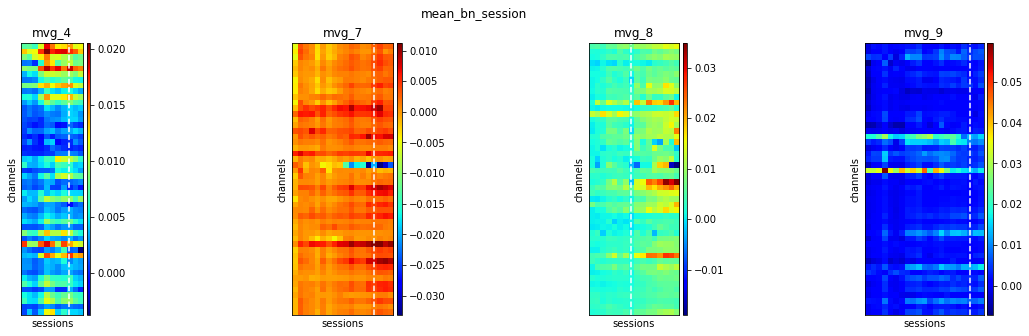

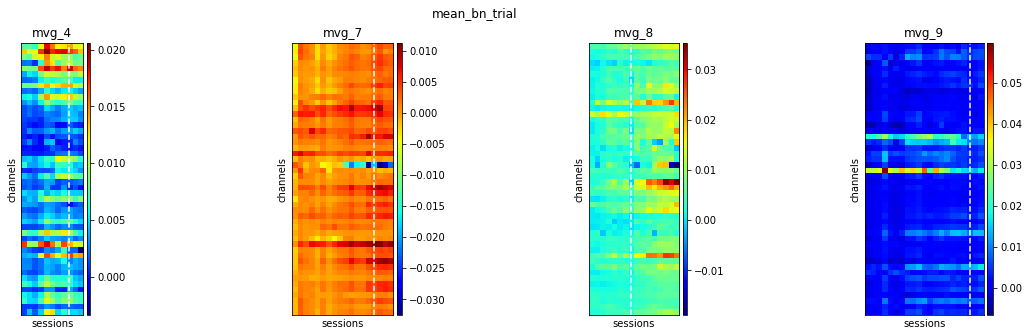

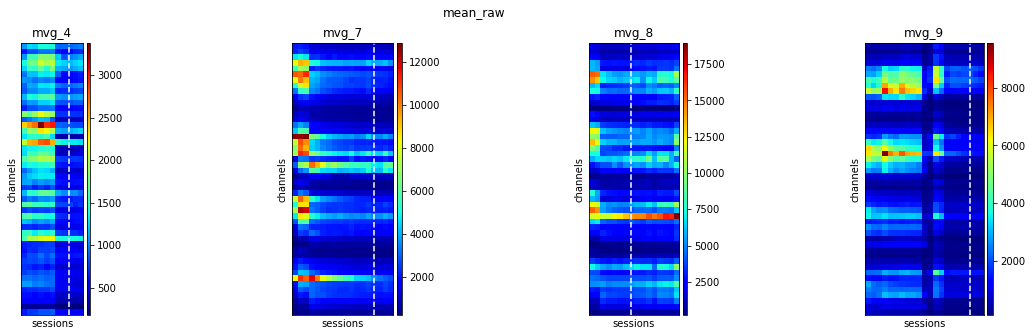

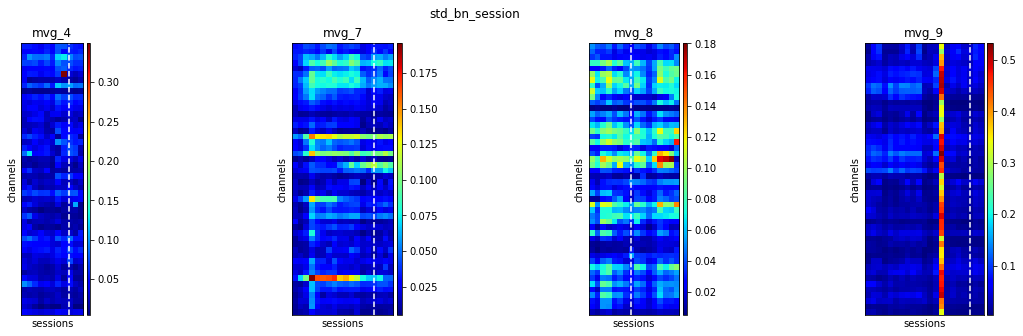

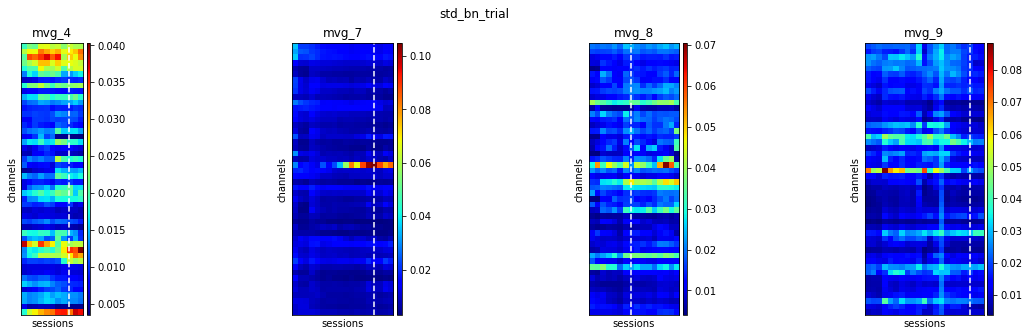

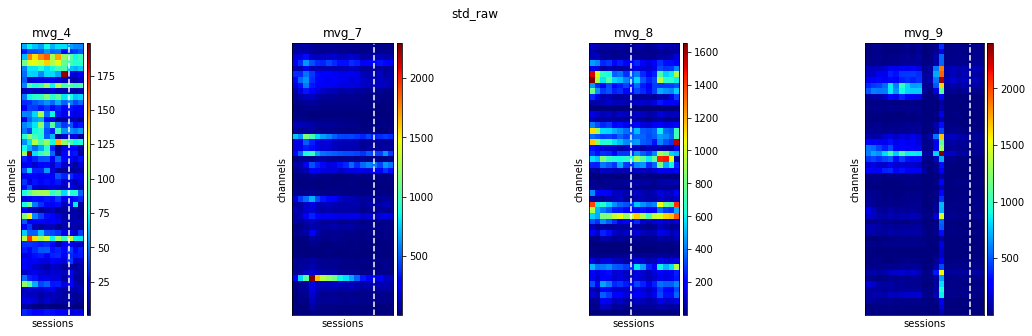

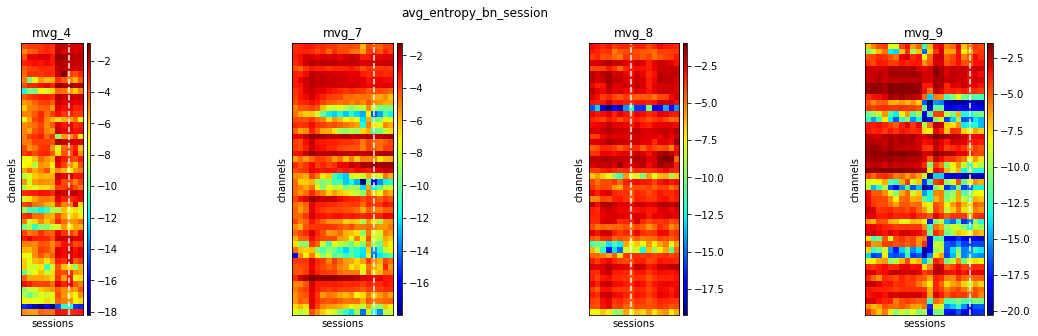

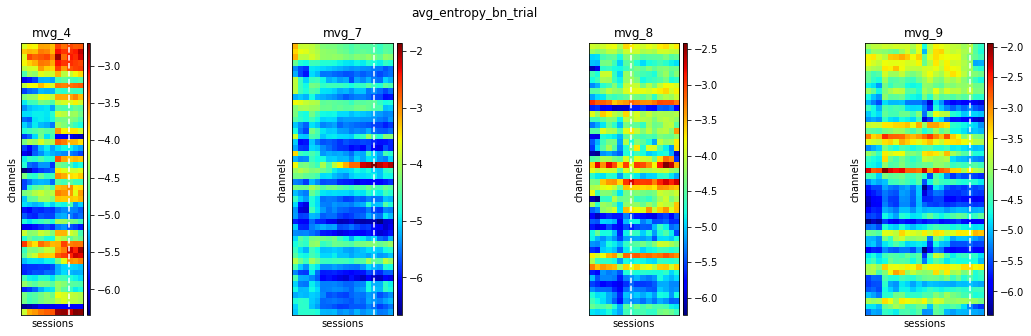

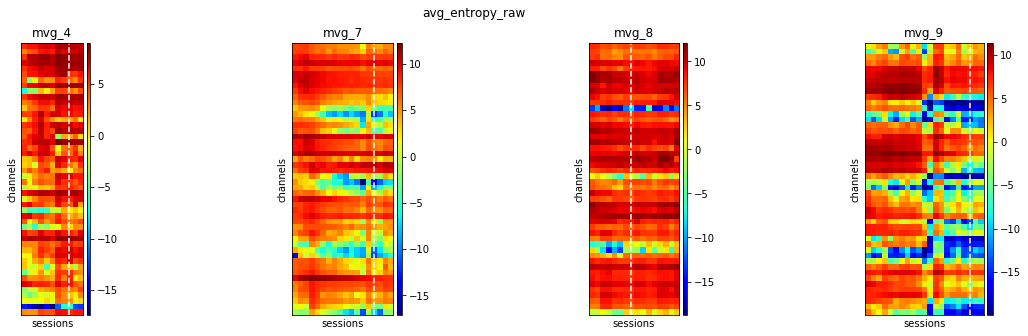

In [21]:
for metricName in ['mean', 'std', 'avg_entropy']:
    for datatype in dataDB.get_data_types(mousename):
        dataName = metricName + '_' + datatype
        imshow_dataset_by_mouse(dataDB, ds, dataName)

# 3. Temporal Structure
## 3.1 Mean vs Time

In [23]:
metricName = 'mean'
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    for datatype in dataDB.get_data_types(mousename):
        dataName = metricName + '_time_' + datatype
        if datatype == 'raw':
            zscoreDim='rs'
        else:
            zscoreDim=None
        
        metric_by_session(dataDB, mc, ds, mousename, metricName, 'ps',
                          datatype=datatype,
                          dataName=dataName,
                          zscoreDim=zscoreDim)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_8', max=16)

IntProgress(value=0, description='mvg_8', max=16)

IntProgress(value=0, description='mvg_8', max=16)

IntProgress(value=0, description='mvg_9', max=21)

IntProgress(value=0, description='mvg_9', max=21)

IntProgress(value=0, description='mvg_9', max=21)

mean_time_bn_session


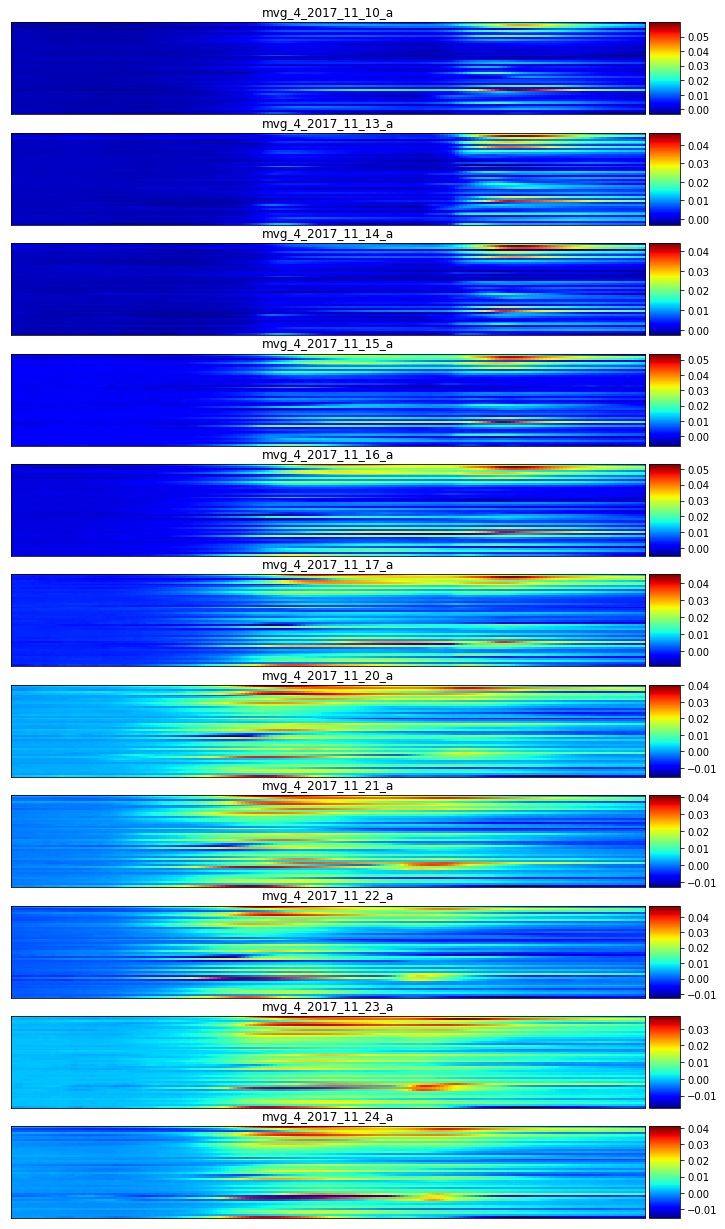

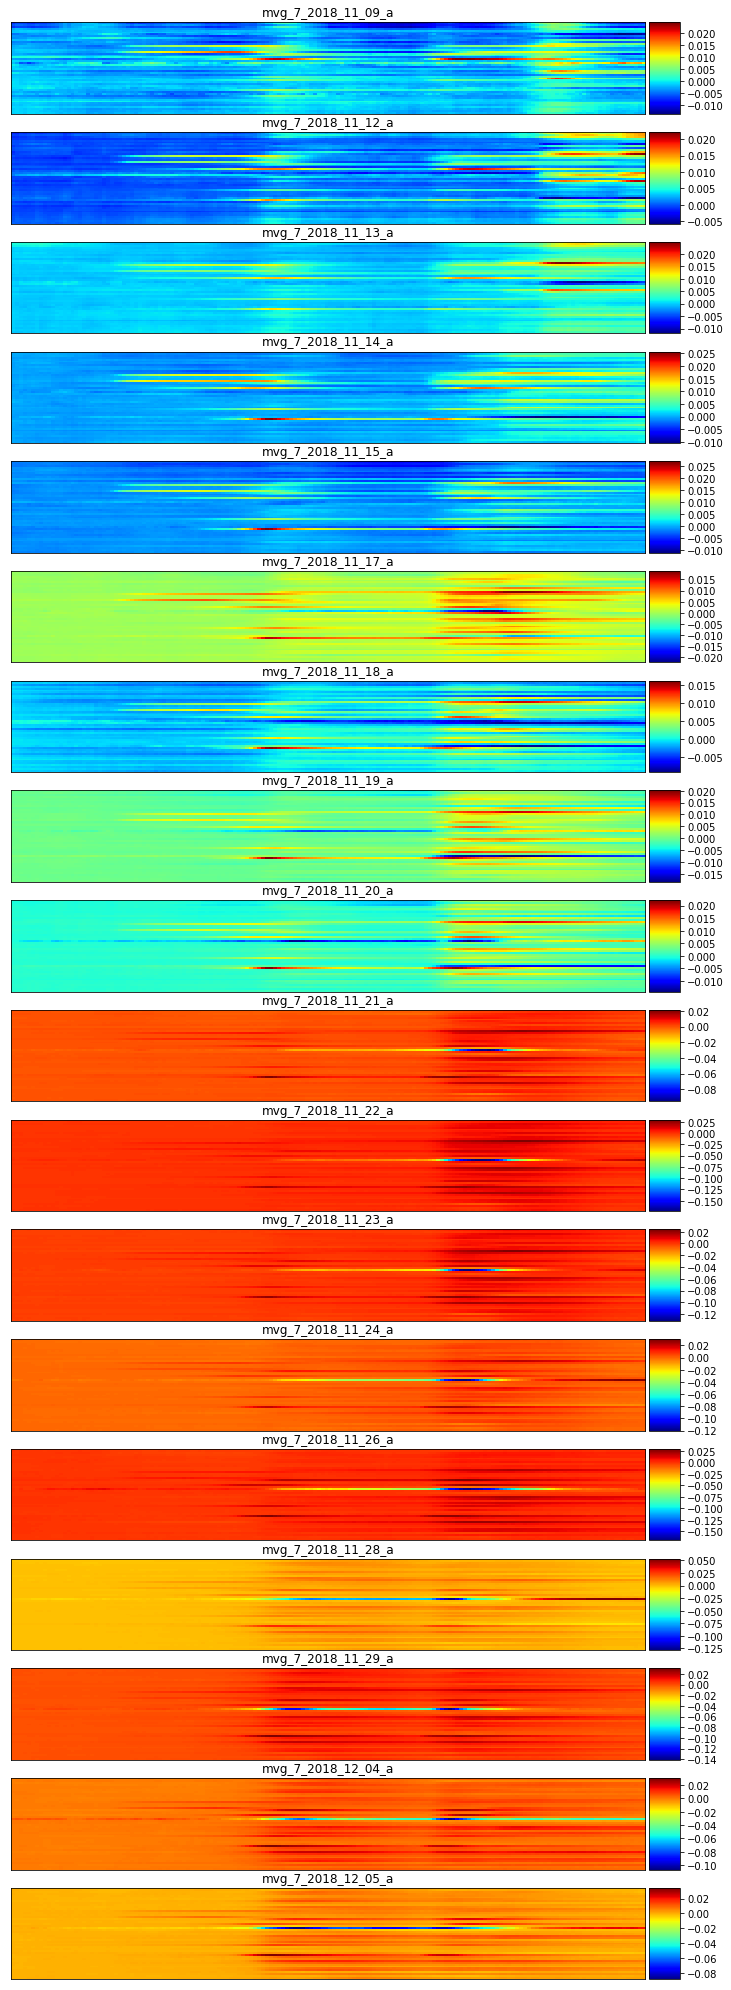

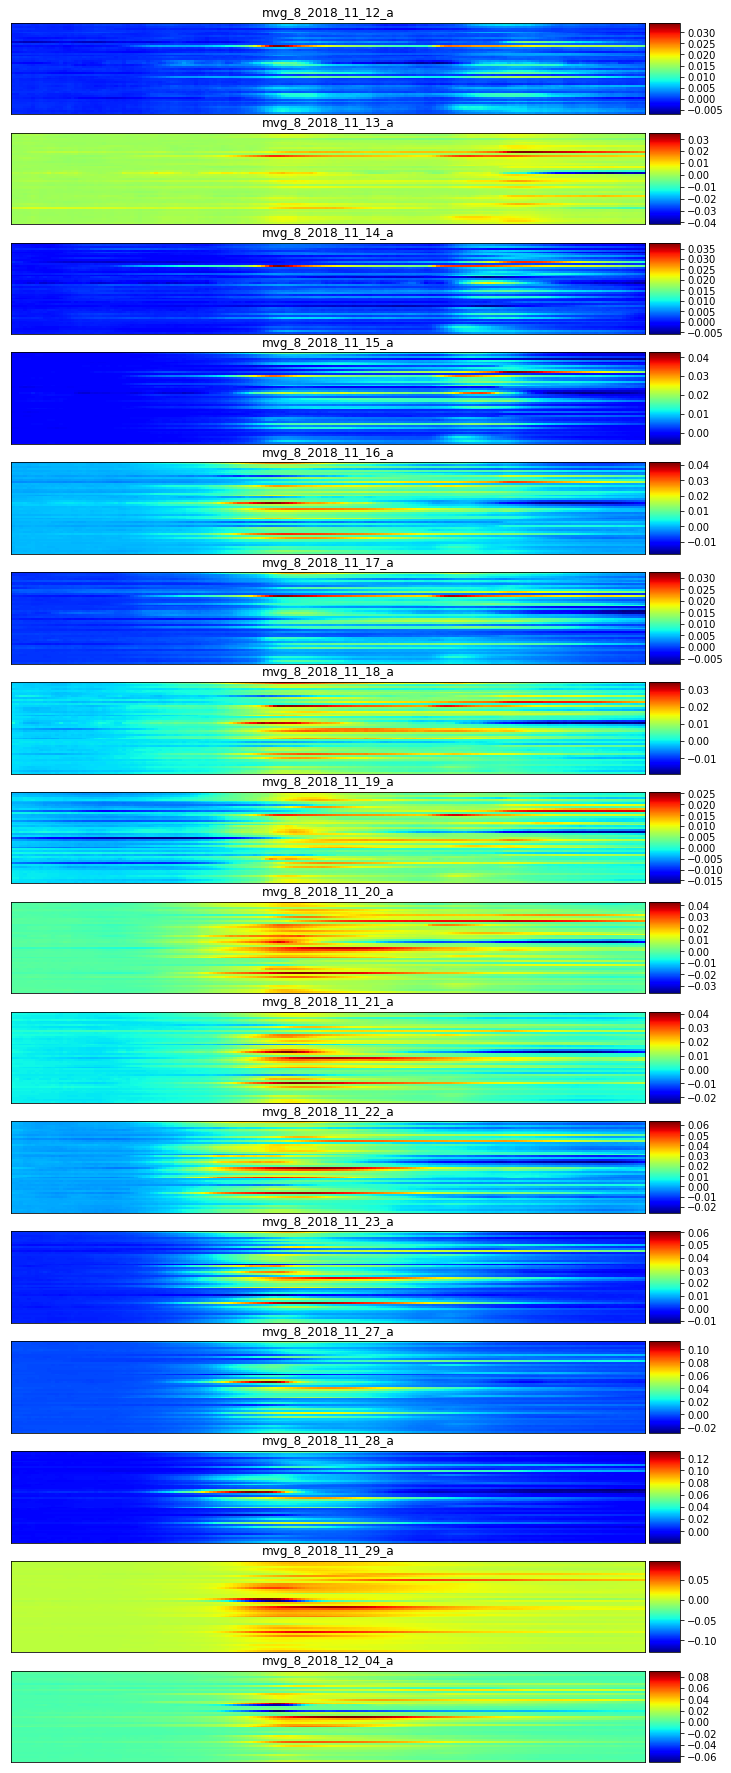

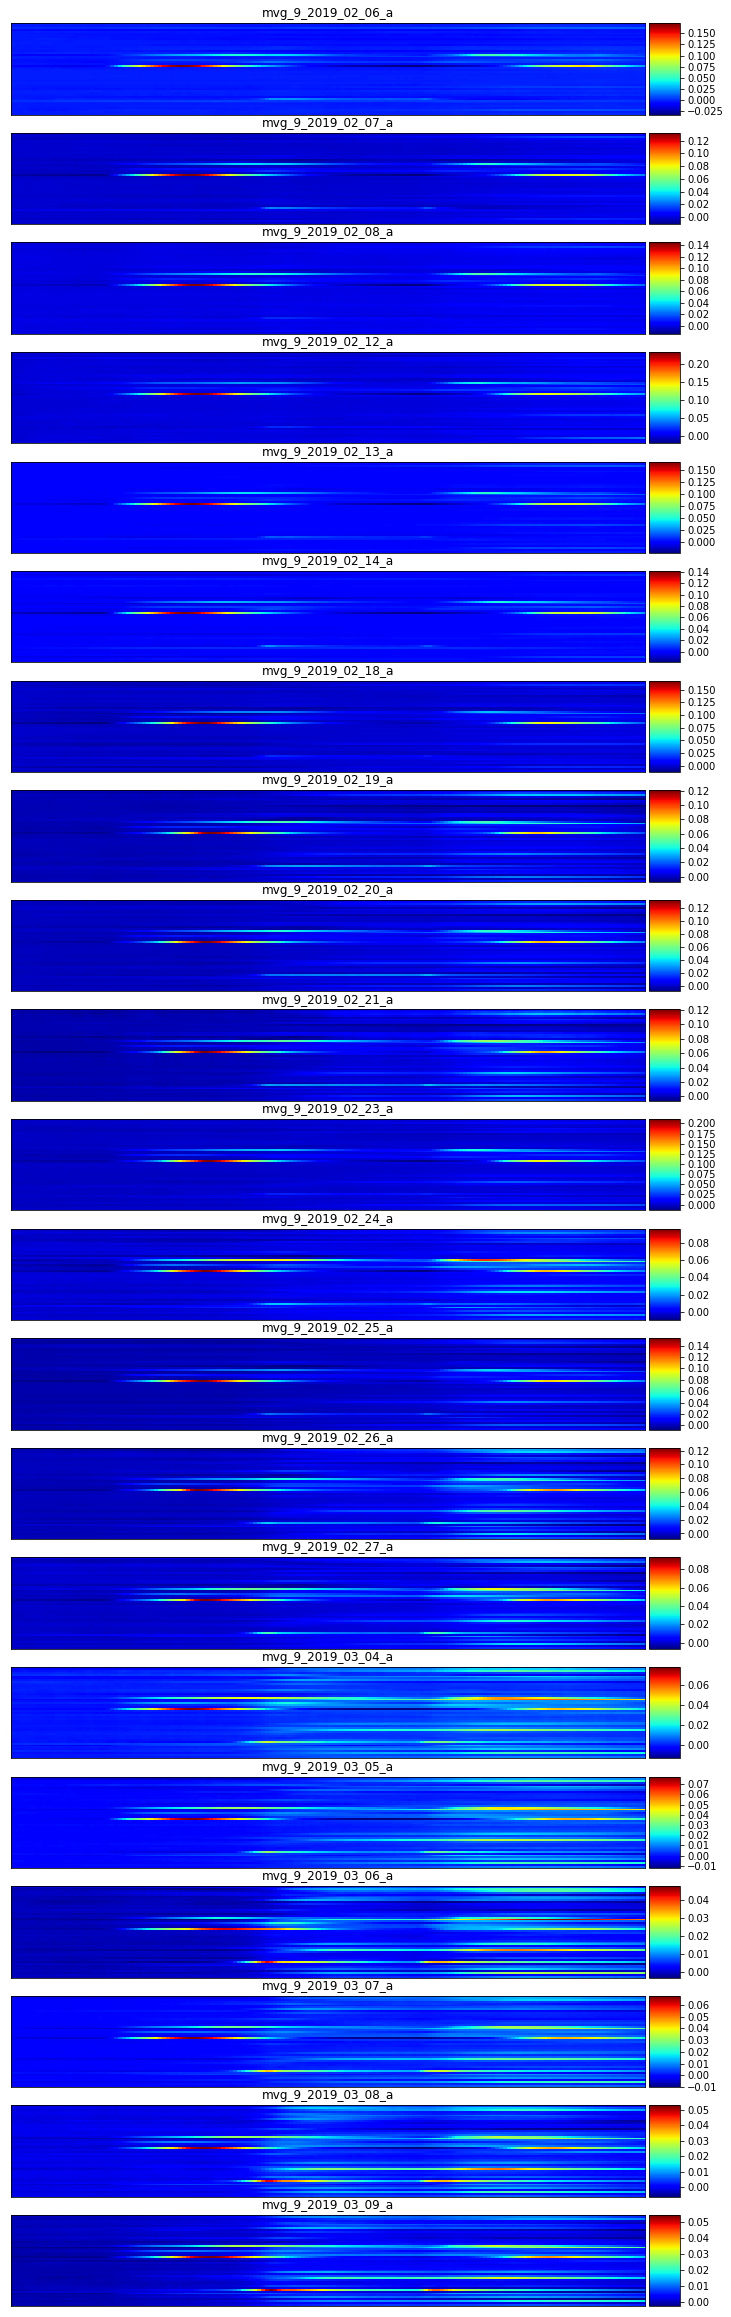

mean_time_bn_trial


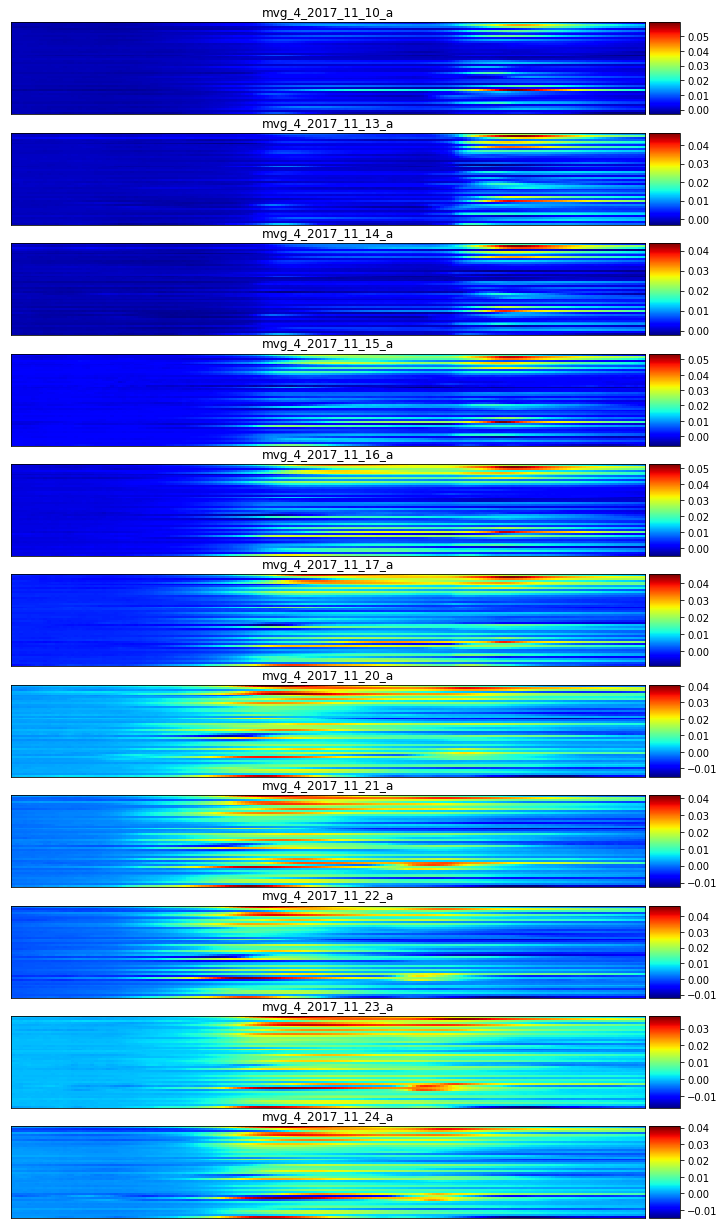

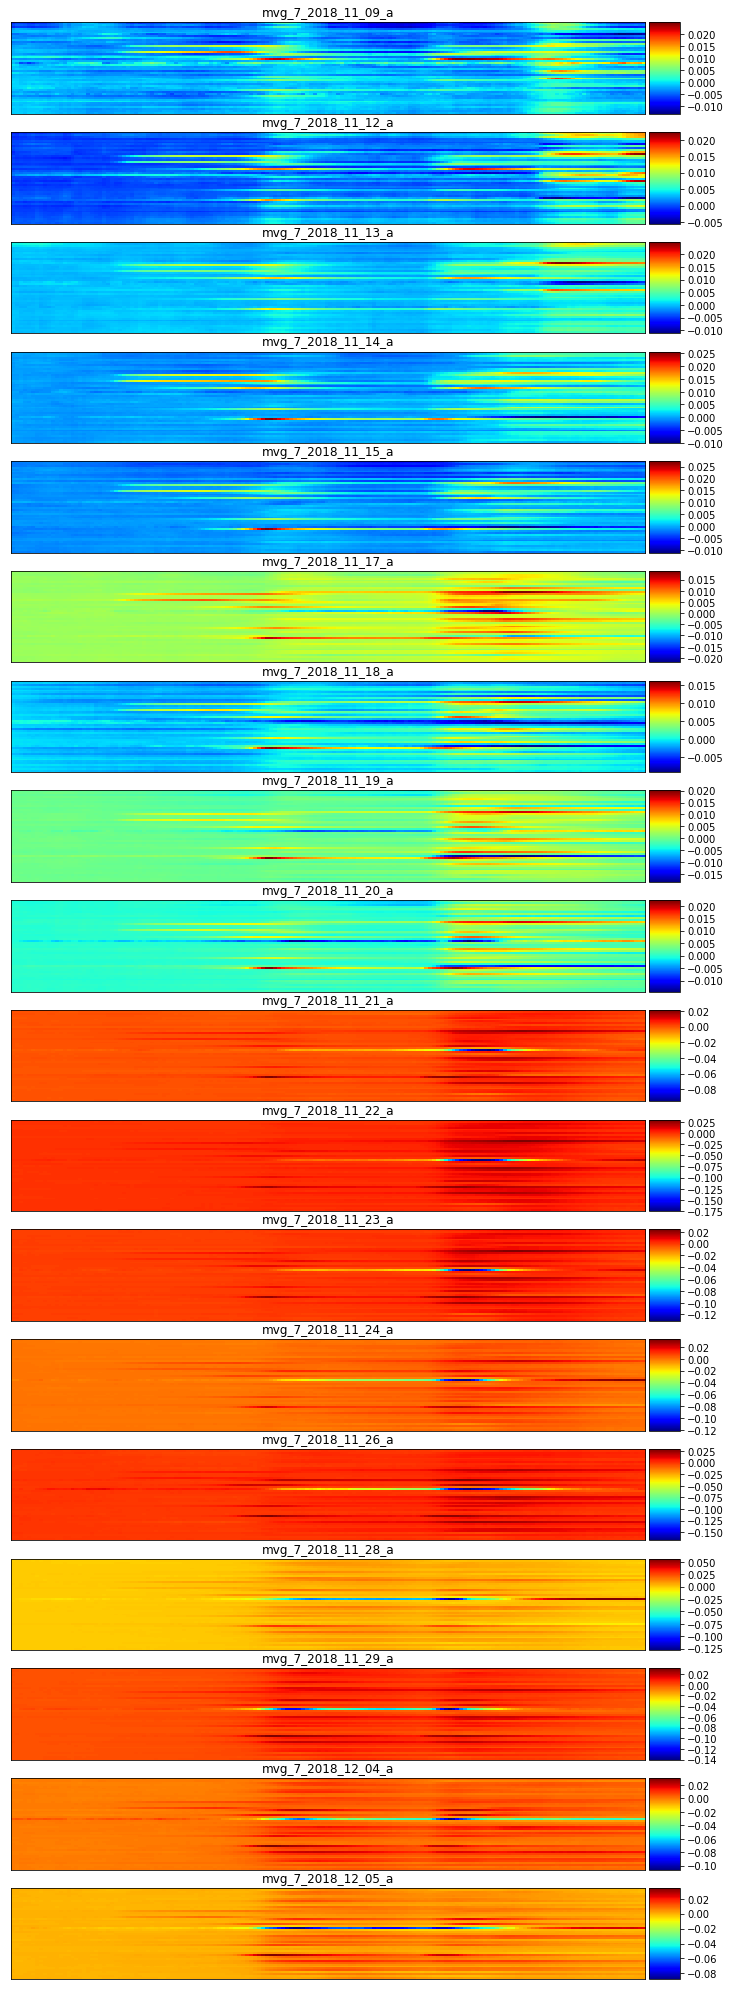

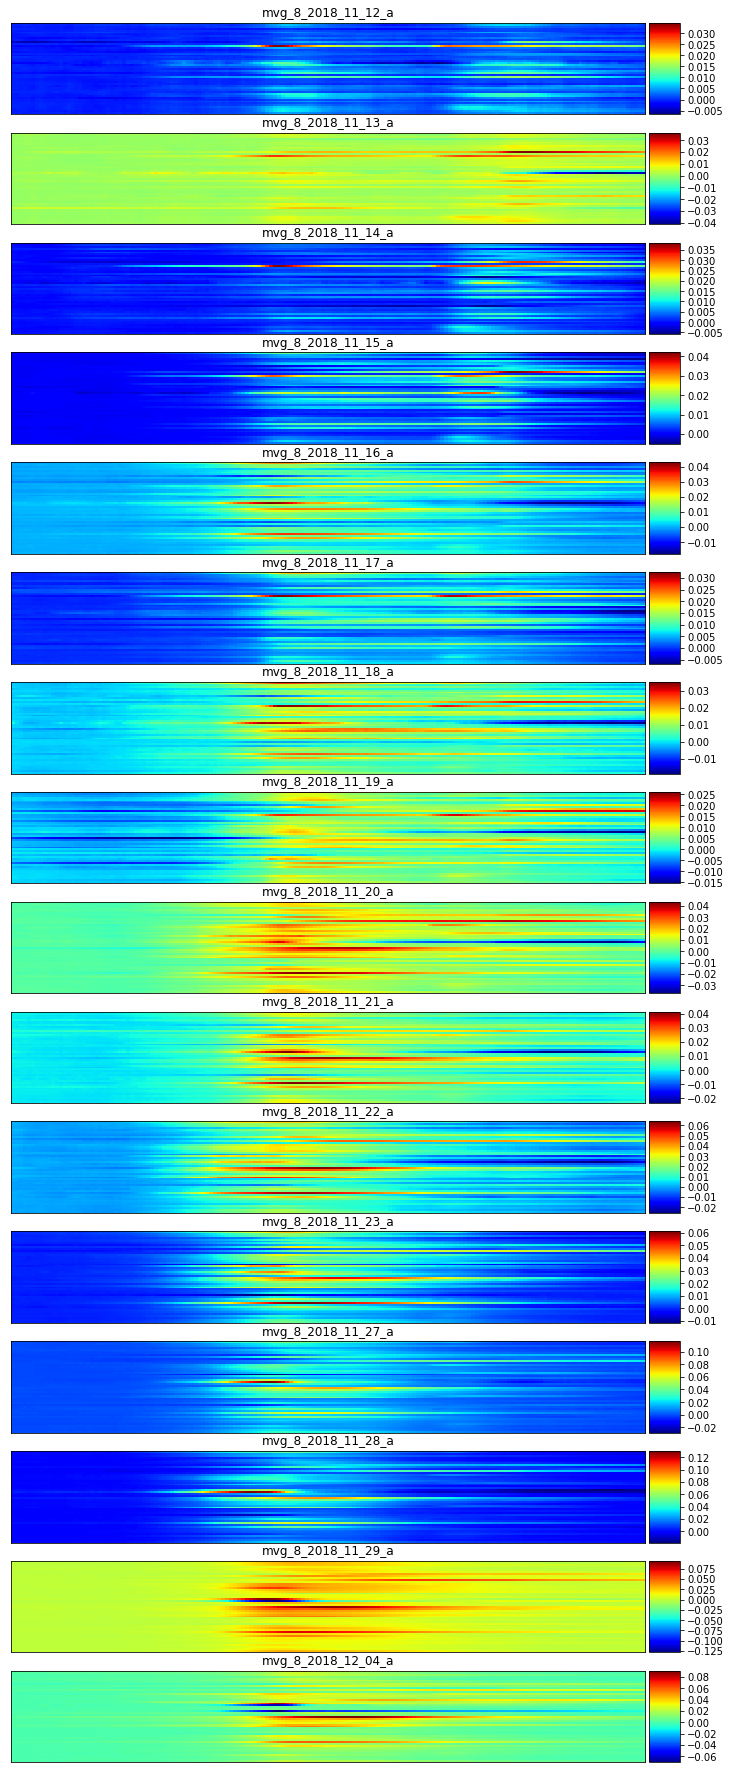

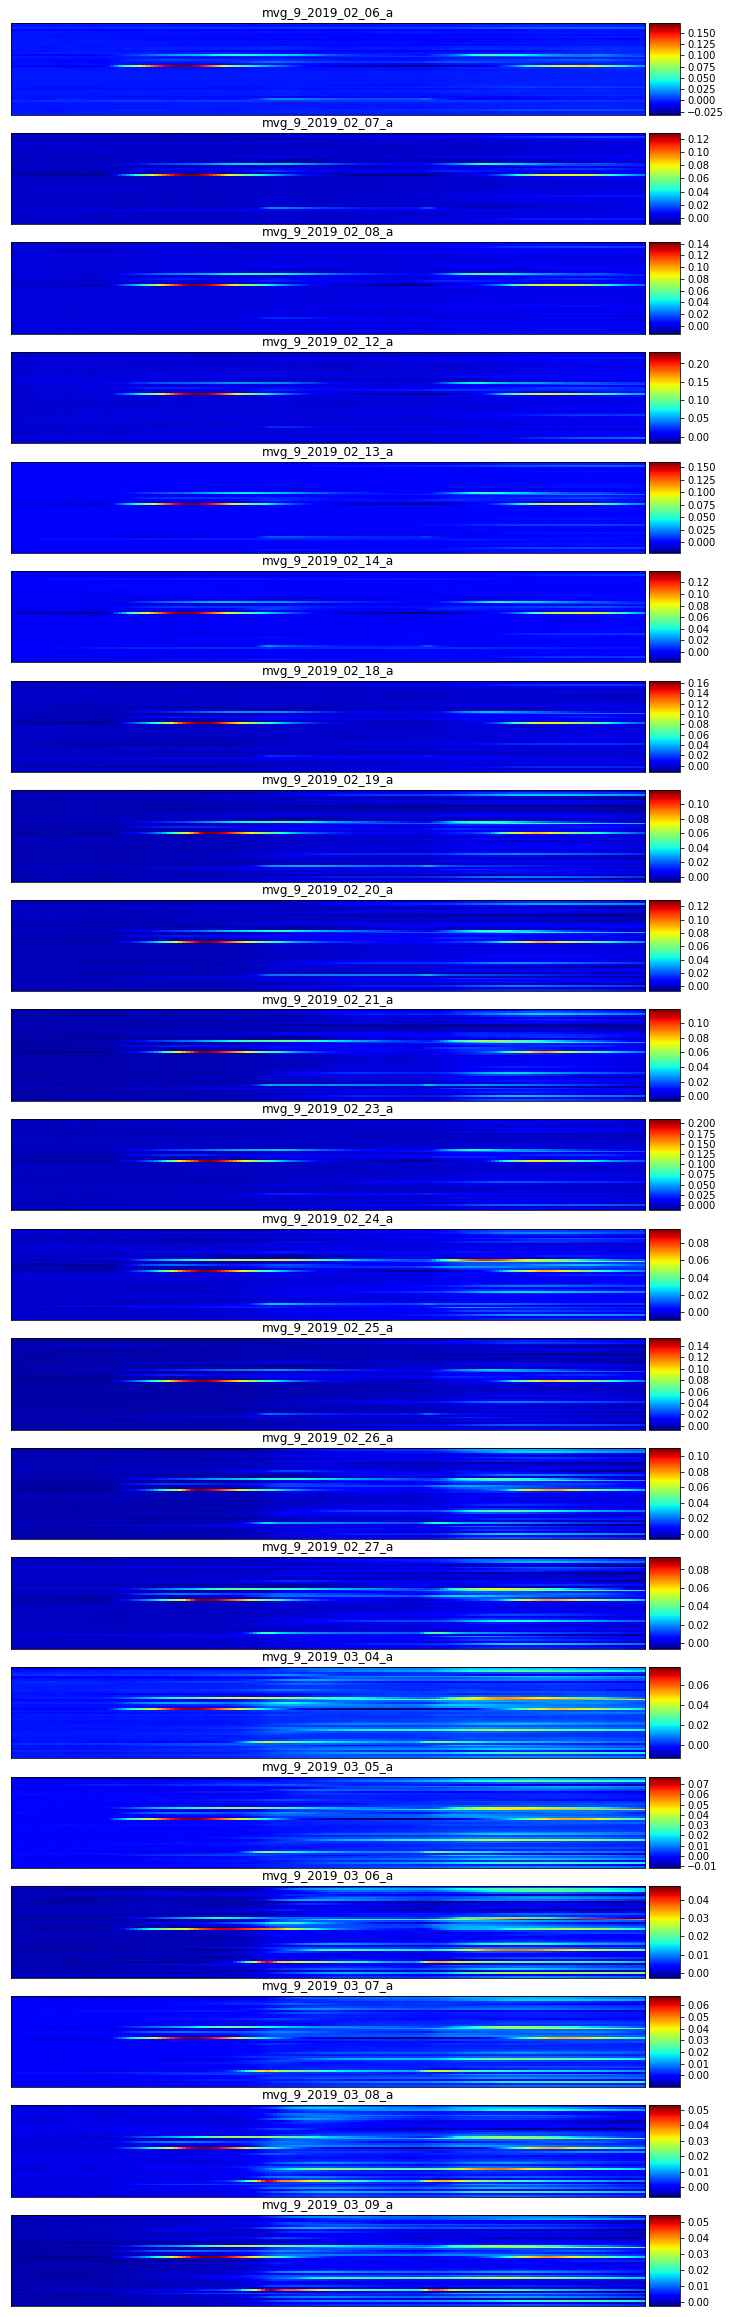

mean_time_raw


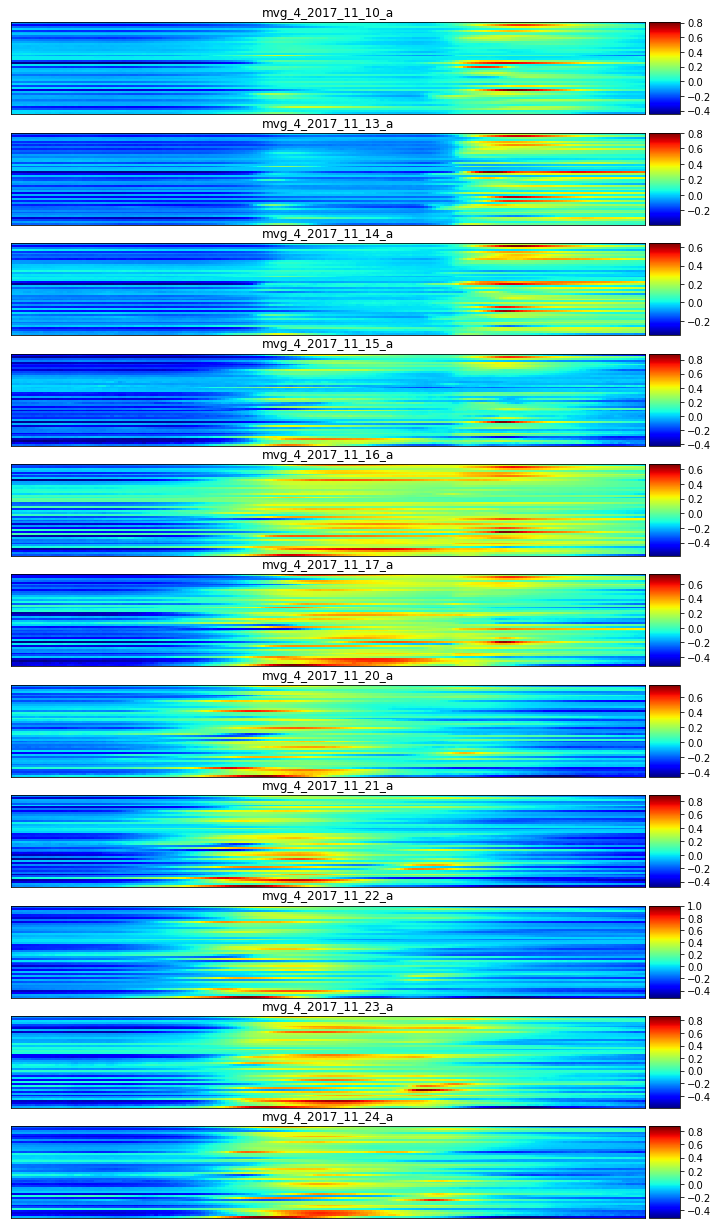

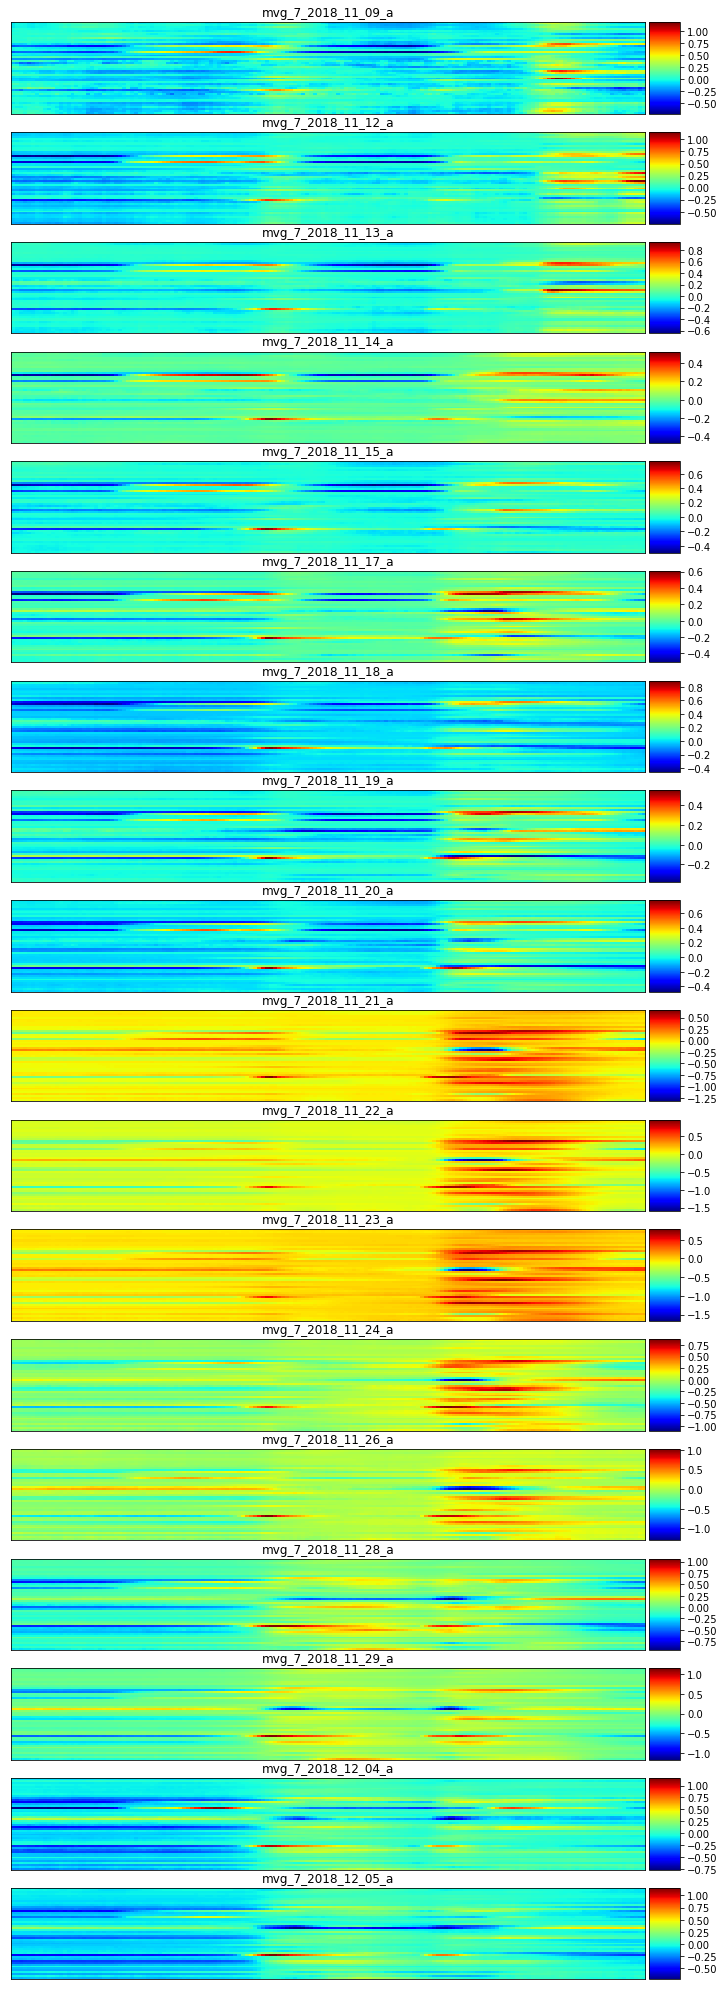

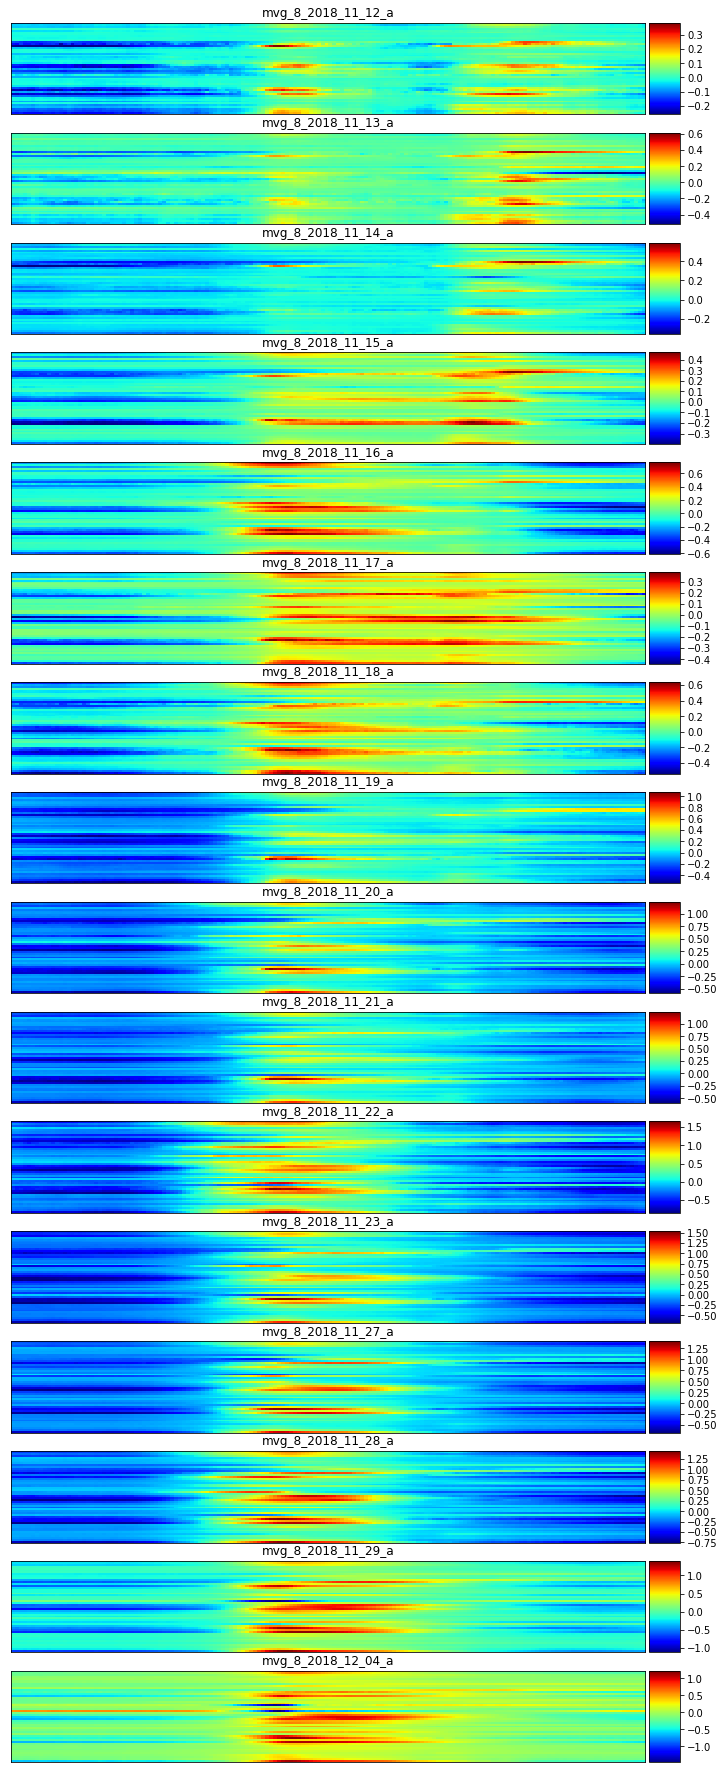

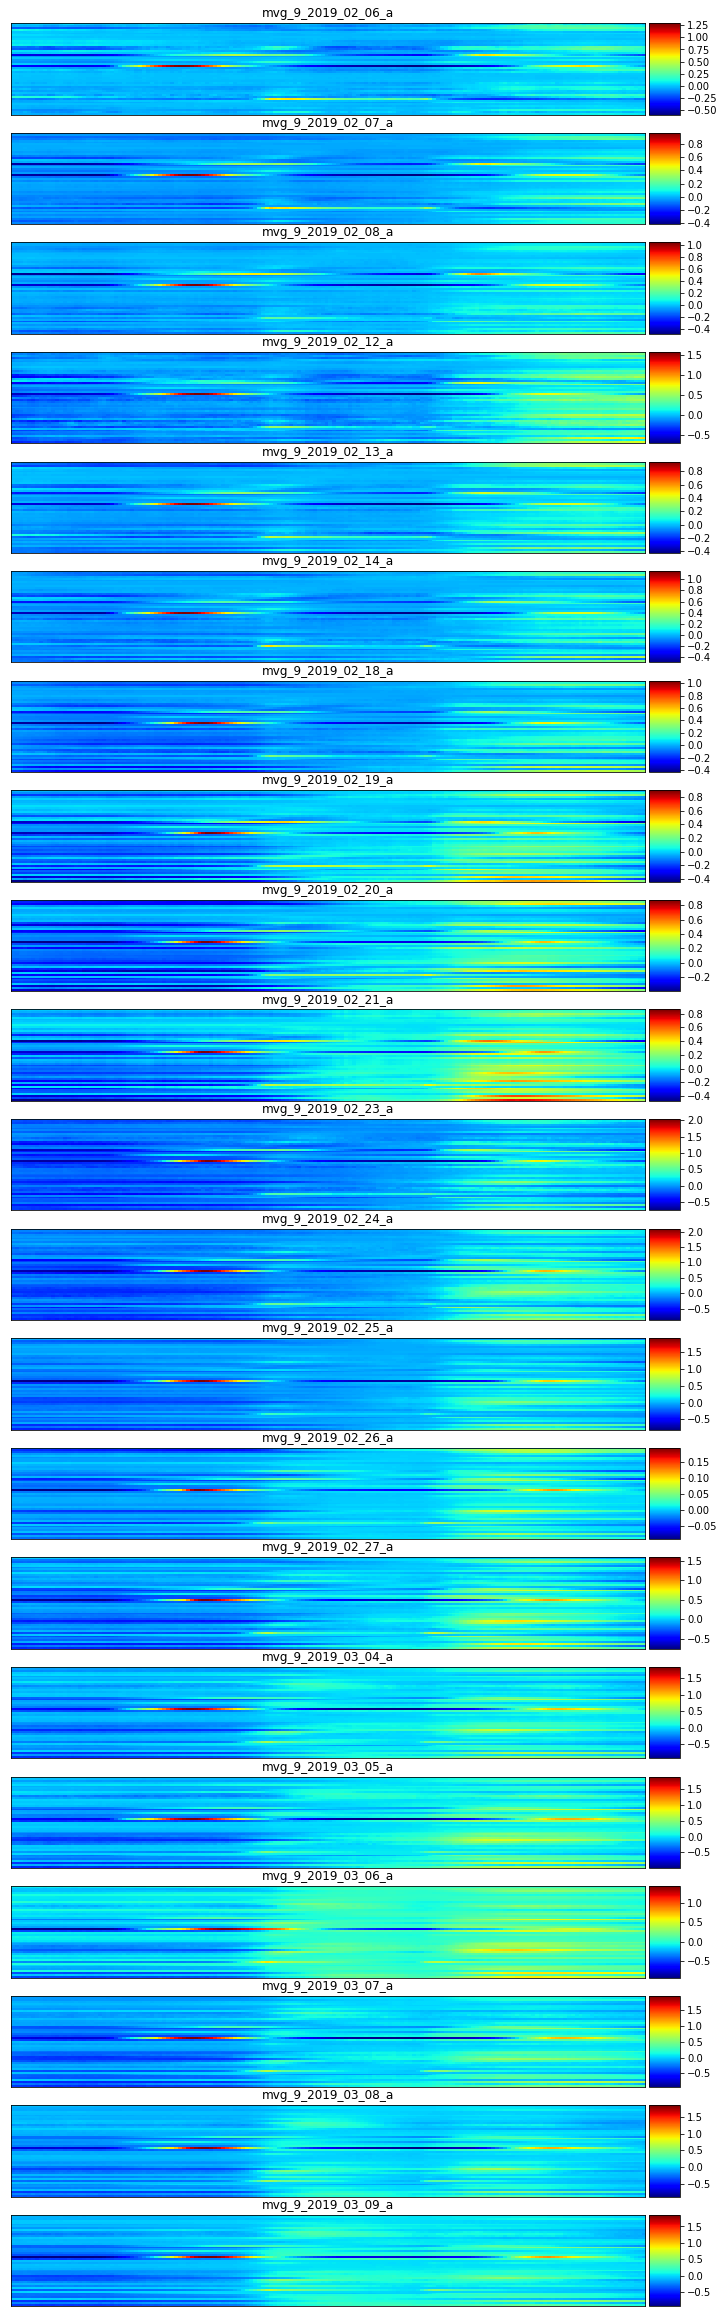

In [26]:
metricName = 'mean'
for datatype in dataDB.get_data_types(mousename):
    dataName = metricName + '_time_' + datatype
    print(dataName)
    
    imshow_dataset_by_session(dataDB, ds, dataName, limits=None,
                              fig1size=(12, 2), colBased=False, aspect='auto')